# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ealaxi/paysim1 . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [2]:
data_original = pd.read_csv("/Users/valentin/github/Ironhack/Datasets/PS_20174392719_1491204439457_log.csv")

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [3]:
# picking 100000 datapoints
data = data_original.sample(10000)

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4832082,347,CASH_OUT,120842.82,C186454103,0.00,0.00,C1883722740,369057.51,489900.33,0,0
6225749,590,PAYMENT,19788.28,C1479293247,50166.00,30377.72,M1813891142,0.00,0.00,0,0
5353593,375,PAYMENT,3572.40,C1162604396,0.00,0.00,M1336079102,0.00,0.00,0,0
2757562,212,CASH_OUT,42539.41,C1643125040,41905.00,0.00,C1185912782,176674.21,219213.61,0,0
4857365,348,CASH_IN,106619.13,C1622077060,772508.32,879127.45,C2089910224,1574068.12,1467448.99,0,0


In [5]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.00000,10000.0
mean,245.253000,1.819026e+05,8.538778e+05,8.781007e+05,1.102086e+06,1.226230e+06,0.00070,0.0
std,142.518225,6.364520e+05,2.911280e+06,2.949143e+06,3.141150e+06,3.396092e+06,0.02645,0.0
min,1.000000,2.040000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
25%,157.000000,1.337850e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
50%,250.000000,7.357093e+04,1.253150e+04,0.000000e+00,1.332240e+05,2.039019e+05,0.00000,0.0
75%,335.000000,2.046582e+05,1.088012e+05,1.492925e+05,9.417389e+05,1.094681e+06,0.00000,0.0
max,718.000000,2.417123e+07,3.095850e+07,3.108930e+07,8.297165e+07,8.271884e+07,1.00000,0.0


In [7]:
# isFlaggedFraud has zero value only
data["isFlaggedFraud"].value_counts()
# we will drop it later

0    10000
Name: isFlaggedFraud, dtype: int64

In [8]:
# isFraud has zero value only
data["isFraud"].value_counts()

0    9993
1       7
Name: isFraud, dtype: int64

In [9]:
# Count NaN values under an entire DataFrame
data.isna().sum().sum()

0

In [10]:
# counting zeroes per column
count = (data['amount'] == 0).sum()
print('Count of zeros in Column  amount : ', count)

Count of zeros in Column  amount :  0


In [11]:
count = (data['step'] == 0).sum()
print('Count of zeros in Column  step : ', count)

Count of zeros in Column  step :  0


In [12]:
count = (data['oldbalanceOrg'] == 0).sum()
print('Count of zeros in Column  oldbalanceOrg : ', count)
# might need to be dropped

Count of zeros in Column  oldbalanceOrg :  3349


In [13]:
count = (data['newbalanceOrig'] == 0).sum()
print('Count of zeros in Column  newbalanceOrig : ', count)
# might need to be dropped

Count of zeros in Column  newbalanceOrig :  5640


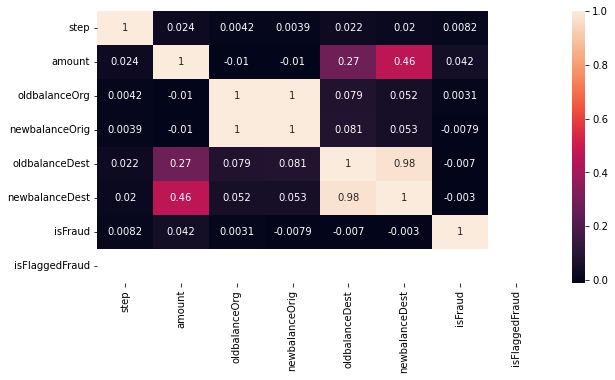

In [14]:
fig, ax = plt.subplots(figsize=(10,5)) 
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [15]:
# we should drop correlated columns
# oldBalanceOrg, newbalanceOrig, oldbalanceDest and newbalanceDest

### What is the distribution of the outcome? 

In [16]:
data['isFlaggedFraud'].value_counts()

0    10000
Name: isFlaggedFraud, dtype: int64

array([[<AxesSubplot:title={'center':'isFlaggedFraud'}>]], dtype=object)

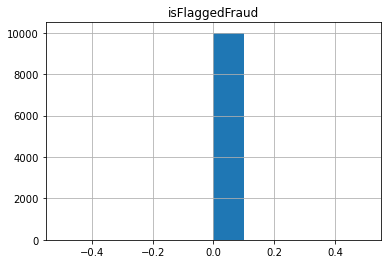

In [17]:
data.hist(column='isFlaggedFraud')

In [18]:
data['isFraud'].value_counts()
# the distribution of the outcome is imballanced. We need to resample the training data

0    9993
1       7
Name: isFraud, dtype: int64

array([[<AxesSubplot:title={'center':'isFraud'}>]], dtype=object)

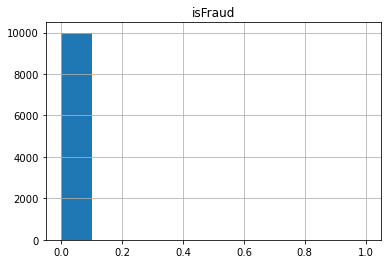

In [19]:
data.hist(column='isFraud')

In [ ]:
# we have a balance problem. Will use resample to balance the dataset

Class 0: 6354407
Class 1: 8213
Proportion: 773.7 : 1


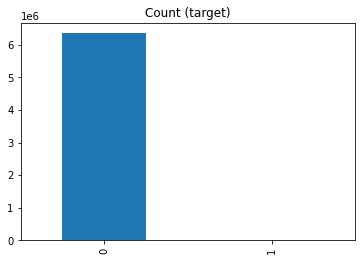

In [44]:
target_count = data_original['isFraud'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [20]:
data = data.drop(['oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'], axis=1)

In [21]:
# Your code here
data.head()

,step,type,amount,nameOrig,nameDest,isFraud
4832082,347,CASH_OUT,120842.82,C186454103,C1883722740,0
6225749,590,PAYMENT,19788.28,C1479293247,M1813891142,0
5353593,375,PAYMENT,3572.40,C1162604396,M1336079102,0
2757562,212,CASH_OUT,42539.41,C1643125040,C1185912782,0
4857365,348,CASH_IN,106619.13,C1622077060,C2089910224,0


In [22]:
# checkigng the values in step in descending order to see what kind of numbers come up
data.sort_values('step', ascending=False)

,step,type,amount,nameOrig,nameDest,isFraud
6361932,718,PAYMENT,18625.72,C1573107701,M554353533,0
6359761,715,CASH_OUT,98619.45,C781208040,C910382142,0
6358313,714,CASH_OUT,169049.35,C1785420631,C651097110,0
6356952,710,CASH_OUT,404221.02,C852900197,C1474596966,0
6354924,709,CASH_OUT,10680.96,C152376777,C1213004536,0
...,...,...,...,...,...,...
757,1,PAYMENT,5924.89,C1829460911,M1662912171,0
2673,1,CASH_IN,312061.25,C1248310508,C401424608,0
882,1,CASH_OUT,105759.12,C480402503,C1318822808,0
1625,1,PAYMENT,1557.98,C2135790485,M790229674,0


In [23]:
data['type'].unique()

array(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],
      dtype=object)

In [24]:
data = pd.get_dummies(data, columns=['type'])

In [25]:
data.head()

,step,amount,nameOrig,nameDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4832082,347,120842.82,C186454103,C1883722740,0,0,1,0,0,0
6225749,590,19788.28,C1479293247,M1813891142,0,0,0,0,1,0
5353593,375,3572.40,C1162604396,M1336079102,0,0,0,0,1,0
2757562,212,42539.41,C1643125040,C1185912782,0,0,1,0,0,0
4857365,348,106619.13,C1622077060,C2089910224,0,1,0,0,0,0


In [26]:
data = data.drop(['nameOrig', 'nameDest'], axis=1)


In [27]:
data.head()

,step,amount,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4832082,347,120842.82,0,0,1,0,0,0
6225749,590,19788.28,0,0,0,0,1,0
5353593,375,3572.40,0,0,0,0,1,0
2757562,212,42539.41,0,0,1,0,0,0
4857365,348,106619.13,0,1,0,0,0,0


In [28]:
data.dtypes

step               int64
amount           float64
isFraud            int64
type_CASH_IN       uint8
type_CASH_OUT      uint8
type_DEBIT         uint8
type_PAYMENT       uint8
type_TRANSFER      uint8
dtype: object

### Run a logisitc regression classifier and evaluate its accuracy.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [62]:
# Your code here
x = data.loc[:, data.columns != 'isFraud']
y = data['isFraud']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=5)

In [64]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.9988

In [65]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = model1.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.0
recall:  0.0
f1:  0.0


/Users/valentin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,pred)

array([[2497,    0],
       [   3,    0]])

In [ ]:
# this does not look good

### Now pick a model of your choice and evaluate its accuracy.

In [30]:
# Your code here

### Which model worked better and how do you know?

In [31]:
# Your response here

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.